# Metric: Best park (Playgrounds and courts)  
https://data.wprdc.org/dataset/playgrounds  
https://data.wprdc.org/dataset/city-of-pittsburgh-courts
---

Importing pandas and data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

playgrounds = pd.read_csv("playgrounds.csv")
courts = pd.read_csv("courts.csv")

Checking number of unique neighborhoods in each dataset

In [17]:
print("Playgrounds:",len(playgrounds['neighborhood'].unique()))
print("Courts:",len(courts['neighborhood'].unique()))

Playgrounds: 67
Courts: 63


Checking number of parks neighborhoods in each dataset

In [14]:
print("Playgrounds:",len(playgrounds['park'].unique()))
print("Courts:",len(courts['park'].unique()))

Playgrounds: 109
Courts: 98


### Proceeding to work with the playgrounds dataset alone

Viewing the first five rows of the dataset

In [50]:
playgrounds.head(5)

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
4,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064


Checking if there are parks with more than one playground

In [46]:
print(len(playgrounds.index))
print(len(playgrounds['park'].unique()))

124
109


#### Finding who maintains most number of playgrounds

In [52]:
playgrounds.groupby('maintenance_responsibility').count()

,id,name,type,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
maintenance_responsibility,,,,,,,,,,,,,,,,
Parks - Eastern,12,12,0,12,12,11,12,12,12,12,12,12,12,12,12,12
Parks - Northeast,19,19,0,19,19,19,19,19,19,19,19,19,19,19,19,19
Parks - Northern,19,19,0,19,19,19,19,19,19,19,19,19,19,19,19,19
Parks - Schenley,24,24,0,24,24,24,24,24,24,24,24,24,24,24,24,24
Parks - Southern,21,21,0,21,21,20,21,21,21,21,21,21,21,21,21,21
Parks - Western,25,25,0,25,25,25,25,25,25,25,25,25,25,25,25,25


Creating a new dataset to work with maintenance_responsibility column

In [117]:
maintenance = playgrounds.groupby('maintenance_responsibility').count()

<AxesSubplot:xlabel='maintenance_responsibility'>

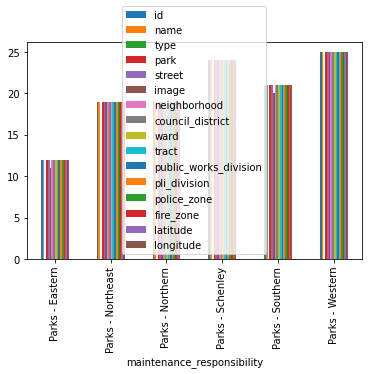

In [54]:
maintenance.plot.bar()

<AxesSubplot:ylabel='park'>

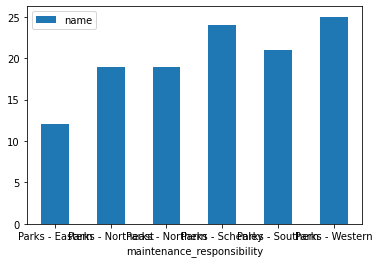

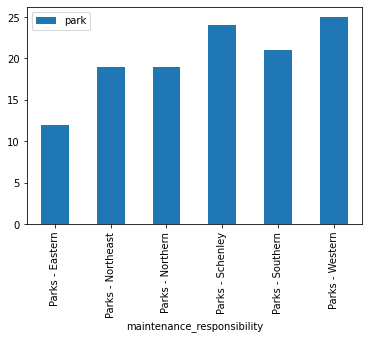

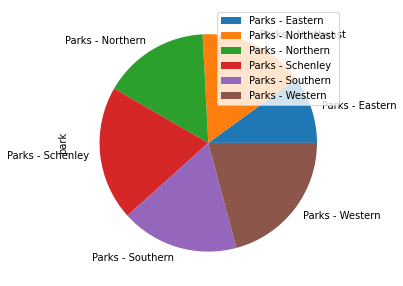

In [92]:
maintenance.plot.bar(y='name',rot=0)  # name/park/neighborhooh give same counts
maintenance.plot.bar(y='park')
maintenance.plot.pie(y='park', figsize=(5,5))

Visual representation of the data  
-The top playgrounds/most number of playgrounds are maintained by Parks-Western followed by Parks-Schenley

Text(0, 0.5, 'Maintanined by')

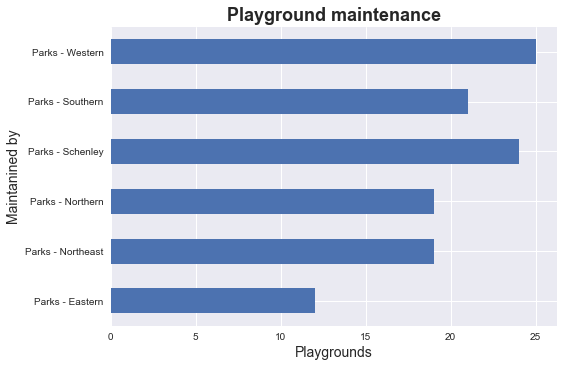

In [81]:
plt.style.use('seaborn')
playgrounds.groupby('maintenance_responsibility').count().plot.barh(legend=None,y='park')
plt.title("Playground maintenance",fontsize=18,fontweight='bold')
plt.xlabel("Playgrounds",fontsize=14)
plt.ylabel("Maintanined by",fontsize=14)

#### Finding the parks with more than one playground

Creating a new dataset to work with park column

In [85]:
def filter_function(x,threshold):
    return x['name']>threshold

parks = playgrounds.groupby('park').count()
parks = parks.groupby(parks.index).filter(filter_function,threshold=1)
parks.head(100)

,id,name,type,maintenance_responsibility,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
park,,,,,,,,,,,,,,,,
Allegheny Commons,4,4,0,4,4,4,4,4,4,4,4,4,4,4,4,4
Frick Park,2,2,0,2,2,1,2,2,2,2,2,2,2,2,2,2
Highland Park,4,4,0,4,4,4,4,4,4,4,4,4,4,4,4,4
McKinley Park,3,3,0,2,3,1,3,3,3,3,3,3,3,3,3,3
Schenley Park,6,6,0,6,6,6,6,6,6,6,6,6,6,6,6,6
Sheraden Park,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2


<AxesSubplot:ylabel='name'>

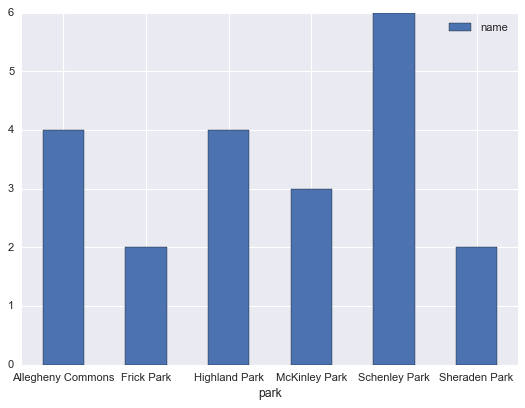

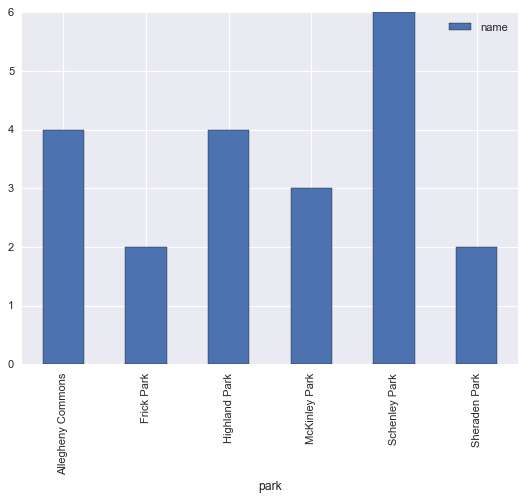

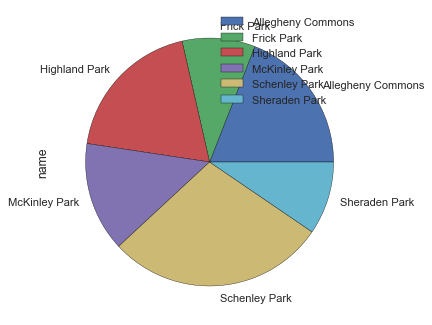

In [132]:
parks.plot.bar(y='name',rot=0)  
parks.plot.bar(y='name')
parks.plot.pie(y='name', figsize=(5,5))

Visual representation of the data  
-Considering only parks with more than one playground  
-Schenley Park has most number of playgrounds folllowed by Allegheny Commmons and Highland Park at the same level and McKinley Park

Text(0, 0.5, 'Playgrounds count')

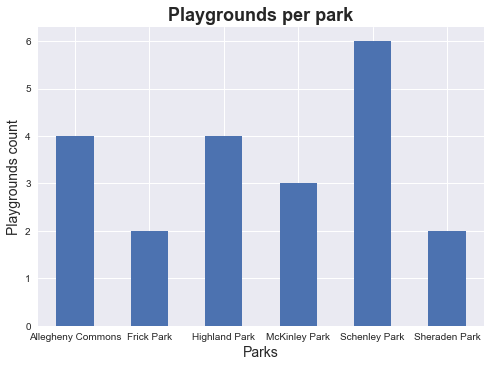

In [89]:
parks.plot.bar(legend=None,y='name',rot=0)  
plt.title("Playgrounds per park",fontsize=18,fontweight='bold')
plt.xlabel("Parks",fontsize=14)
plt.ylabel("Playgrounds count",fontsize=14)

Filtering rowns with the parks Schenley Park, Allegheny Commmons, and Highland Park

In [3]:
def filter_function(x,threshold):
    return x['park']==threshold

playground = playgrounds.groupby(playgrounds.index).filter(filter_function,threshold='Schenley Park')
playground.head(100)

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
17,181350957,Camp David Lawrence Playground,NaN,Parks - Schenley,Schenley Park,OVERLOOK DR,https://tools.wprdc.org/images/pittsburgh/play...,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.433089,-79.945724
94,1036798577,Schenley Anderson Playground,NaN,Parks - Schenley,Schenley Park,PANTHER HOLLOW RD,https://tools.wprdc.org/images/pittsburgh/play...,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.435664,-79.947295
95,1804385194,Schenley Bartlett Playground,NaN,Parks - Schenley,Schenley Park,BARTLETT ST,https://tools.wprdc.org/images/pittsburgh/play...,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.433397,-79.935643
96,1674194853,Schenley Oval Playground,NaN,Parks - Schenley,Schenley Park,OVERLOOK DR,https://tools.wprdc.org/images/pittsburgh/play...,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.431111,-79.945046
97,1110287402,Schenley Overlook Playground,NaN,Parks - Schenley,Schenley Park,OVERLOOK DR,https://tools.wprdc.org/images/pittsburgh/play...,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432150,-79.947723
109,1159646462,Vietnam Veteran's Playground,NaN,Parks - Schenley,Schenley Park,OVERLOOK DR,https://tools.wprdc.org/images/pittsburgh/play...,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.434223,-79.944239


In [146]:
def filter_function(x,threshold):
    return x['park']==threshold

playground = playgrounds.groupby(playgrounds.index).filter(filter_function,threshold='Allegheny Commons')
playground.head(100)

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
26,740206795,Deer Pit Playground,NaN,Parks - Northern,Allegheny Commons,W OHIO ST,https://tools.wprdc.org/images/pittsburgh/play...,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453037,-80.013563
79,2024492541,North Ave. Playground,NaN,Parks - Northern,Allegheny Commons,W NORTH AVE,https://tools.wprdc.org/images/pittsburgh/play...,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454539,-80.010268
103,569607016,Sue Murray Playground,NaN,Parks - Northern,Allegheny Commons,CEDAR AVE,https://tools.wprdc.org/images/pittsburgh/play...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.451633,-80.001552
119,1137558943,Martin Luther King Playground,NaN,Parks - Northern,Allegheny Commons,E NORTH AVE,https://tools.wprdc.org/images/pittsburgh/play...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.455281,-80.004696


In [147]:
def filter_function(x,threshold):
    return x['park']==threshold

playground = playgrounds.groupby(playgrounds.index).filter(filter_function,threshold='Highland Park')
playground.head(4)

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
37,117423564,Farmhouse Playground,NaN,Parks - Northeast,Highland Park,FARMHOUSE RD,https://tools.wprdc.org/images/pittsburgh/play...,Highland Park,7,11,42003980100,2,11,5,3-9,40.476078,-79.913499
51,175255398,Highland Park Super Playground,NaN,Parks - Northeast,Highland Park,RESERVOIR DR,https://tools.wprdc.org/images/pittsburgh/play...,Highland Park,7,11,42003980100,2,11,5,3-9,40.480520,-79.918282
88,1898216923,Pool Grove Playground,NaN,Parks - Northeast,Highland Park,LAKE DR,https://tools.wprdc.org/images/pittsburgh/play...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482711,-79.910304
90,1328645355,Rhododendron Playground,NaN,Parks - Northeast,Highland Park,LAKE DR,https://tools.wprdc.org/images/pittsburgh/play...,Highland Park,7,11,42003980100,2,11,5,3-9,40.479204,-79.910617


* Conclusion: Playgrounds in Schenley Park are maintained by Parks-Schenley which according to our previous analysis was on second postion, so the associated neighborhood Squirrel Hill South gets ranked first. Allegheny Commons and Highland Park are mainted by Parks-Northern and Parks-Northeast respectively, which according to out previous analysis are on the same level, therefore both the corresponding neighborhoods Allegheny Center and Highland Park get ranked second.
* Best Parks in terms of playgrounds:  
  1)Schenley Park  
  2)Allegheny Commons / Highland Park

### Proceeding to work with the courts dataset alone

Viewing the first five rows of the dataset

In [6]:
courts.head(5)

,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
1,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
2,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
3,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
4,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305


Getting summary statistics for number of courts per park

In [29]:
stat = courts.groupby('park').count().describe()
stat.loc[:,'name']

count    98.000000
mean      2.479592
std       2.729108
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max      18.000000
Name: name, dtype: float64

The mean number of courts per park is 2.5 We wish to consider only the top parks that have above average coutrs per park, so we will be considering parks that have more than 3 courts, i.e. parks with at least 4 courts

In [91]:
court = courts.groupby('park').count()

def filter_function(x,threshold):
    return x['name']>threshold

court = court.groupby(court.index).filter(filter_function,threshold=3)

In [44]:
print("Total:",len(court.index))
court.head(100)

Total: 15


,id,name,type,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
park,,,,,,,,,,,,,,,,,
Allegheny Commons,9,9,9,0,4,9,8,9,9,9,9,9,9,9,9,9,9
Arsenal Park,6,6,6,0,6,6,6,6,6,6,6,6,6,6,6,6,6
Burgwin Park,4,4,4,0,4,4,4,4,4,4,4,4,4,4,4,4,4
Davis Park,5,5,5,0,5,5,5,5,5,5,5,5,5,5,5,5,5
Frick Park,10,10,10,0,10,10,10,10,10,10,10,10,10,10,10,10,10
Garland Park,4,4,4,0,4,4,4,4,4,4,4,4,4,4,4,4,4
Heth's Park,5,5,5,0,5,5,5,5,5,5,5,5,5,5,5,5,5
Highland Park,18,18,18,0,18,18,18,18,18,18,18,18,18,18,18,18,18
Kennard Park,5,5,5,0,5,5,5,5,5,5,5,5,5,5,5,5,5


<AxesSubplot:ylabel='name'>

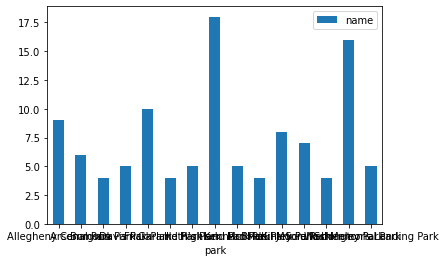

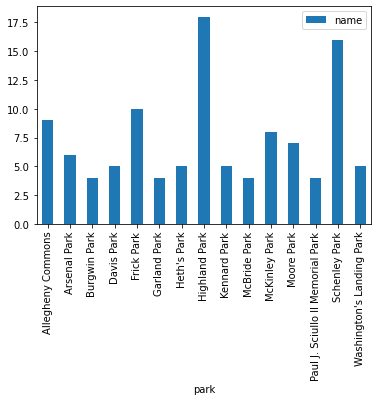

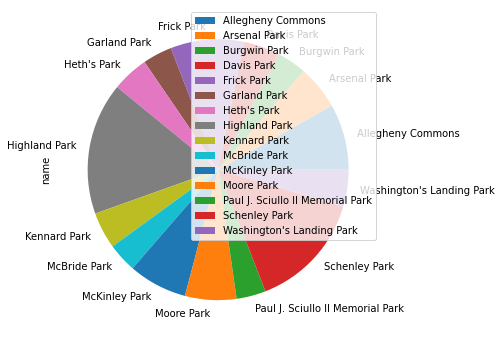

In [42]:
court.plot.bar(y='name',rot=0)  # name/park/neighborhooh give same counts
court.plot.bar(y='name')
court.plot.pie(y='name', figsize=(6,6))

Visual Representation  
-Considering the ones with more than 3/ at least 4/ above average number of courts per park  
-Top four parks in order: Highland Park > Schenley Park > Frick Park > Allegheny commons

Text(0, 0.5, 'Parks')

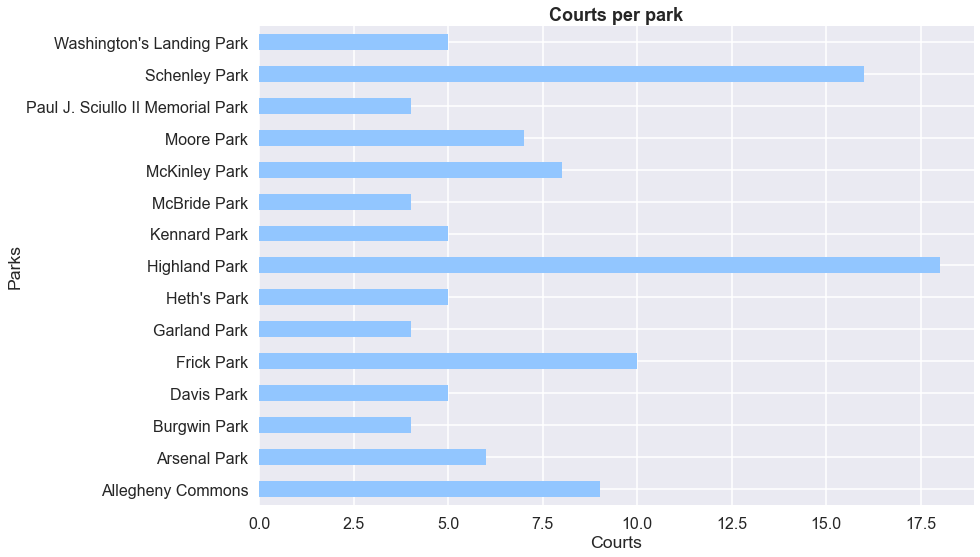

In [103]:
plt.style.use('seaborn-poster')
court.plot.barh(legend=None,y='name')
plt.title("Courts per park",fontsize=18,fontweight='bold')
plt.xlabel("Courts")
plt.ylabel("Parks")

Looking at each sepecific top four parks and the unique courts it has

In [19]:
def filter_function(x,threshold):
    return x['park']==threshold

h_park = courts.groupby(courts.index).filter(filter_function,threshold='Highland Park')
s_park = courts.groupby(courts.index).filter(filter_function,threshold='Schenley Park')
f_park = courts.groupby(courts.index).filter(filter_function,threshold='Frick Park')
a_park = courts.groupby(courts.index).filter(filter_function,threshold='Allegheny Commons')

Text(0, 0.5, '')

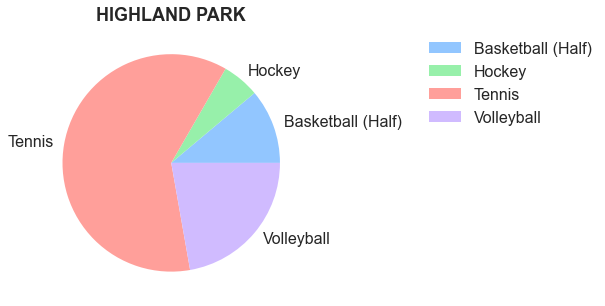

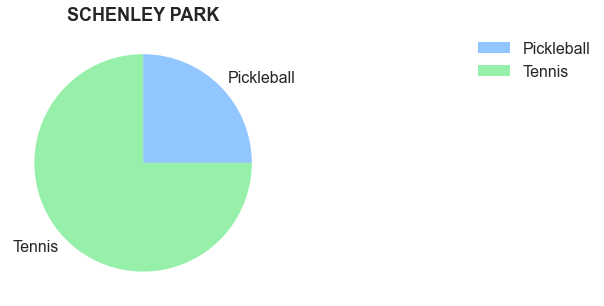

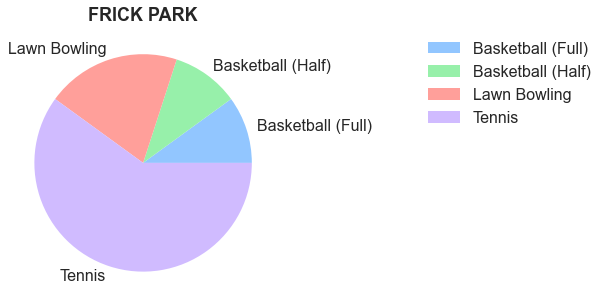

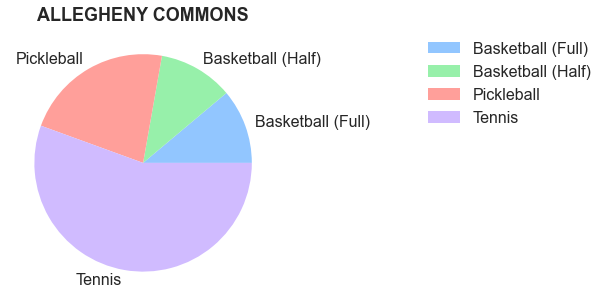

In [118]:
plt.style.use('seaborn-poster')

h_park.groupby('type').count().plot.pie(y='park',figsize=(5,5))
plt.title("HIGHLAND PARK",fontsize=18,fontweight='bold')
plt.legend(bbox_to_anchor=(2.1,1))
plt.ylabel(None)

s_park.groupby('type').count().plot.pie(y='park',figsize=(5,5))
plt.title("SCHENLEY PARK",fontsize=18,fontweight='bold')
plt.legend(bbox_to_anchor=(2.2,1))
plt.ylabel(None)

f_park.groupby('type').count().plot.pie(y='park',figsize=(5,5))
plt.title("FRICK PARK",fontsize=18,fontweight='bold')
plt.legend(bbox_to_anchor=(2.2,1))
plt.ylabel(None)

a_park.groupby('type').count().plot.pie(y='park',figsize=(5,5))
plt.title("ALLEGHENY COMMONS",fontsize=18,fontweight='bold')
plt.legend(bbox_to_anchor=(2.2,1))
plt.ylabel(None)

* It can be observed that Schenly Park, though with a high number of courts has not many choices with respect to the type of courts
* Best Parks in terms of courts:  
  1)Highland Park  
  2)Allegheny Commons / Frick Park  
  3)Schenly Park

### Using analysis from both data sets

From both sets we had the following conclusions  
* Best Parks in terms of playgrounds:  
  1)Schenley Park  
  2)Allegheny Commons / Highland Park  
  
* Best Parks in terms of courts:  
  1)Highland Park  
  2)Allegheny Commons / Frick Park  
  3)Schenly Park

It is important to have best of two worlds, so, finally ranking of parks would be  

1) Highland Park  
2) Allegheny Commons  
3) Schenly Park

## Ranking of the neighborhoods associated with the parks

#### 1) Highland Park  
#### 2) Allegheny Center  
#### 3) Squirrel Hill South